In [1]:
from gwdip import *

def chirp_mass(m1,m2):
    return np.power(m1*m2,3/5.)/np.power(m1+m2,1/5.)

# List of sensitivity files, ET in triangular configuration, 2 CE
O5_list=['asd/ET_sens.txt','asd/ET_sens.txt','asd/ET_sens.txt','asd/ce_strain.txt','asd/ce_strain.txt']
num_detectors=len(O5_list)
interp=fit_PSD_factor(O5_list,10,2048) # Perform the interpolation for the sensitivity

Nsamp=100000 # Number of GW signals to simulate per loop
Ndet=10000000 # Total number of GW signals you want

# CMB dipole from https://arxiv.org/pdf/2111.03616.pdf
dipole_magnitude,snr_thr,binary_type=0.00123358862*5,9.,'BBH'

# Initialize the redhsift and mass distributions for BBHs
zp=icarogw.priors.redshift.redshift_prior(icarogw.cosmologies.flatLCDM(zmax=20.),'madau',{'gamma':2.7,'kappa':3.0,'zp':2.0})
mp=icarogw.priors.mass.mass_prior('BBH-powerlaw-gaussian',{'alpha':3.4,'beta':1.1,'mmax':87.,'mmin':5.1,'delta_m':4.8,'sigma_g':3.6,'mu_g':34.
                                                          ,'lambda_peak':0.03})

# Calculates the detected events
bin_det,Ngen=loop_detections(zp,mp,Nsamp,Ndet,interp,num_detectors,dipole_magnitude,snr_thr,binary_type)
bin_det['dipole_magnitude'],bin_det['Ngen']=dipole_magnitude,Ngen

/home/simone/git_repositories/cosmic_dipole_GW_3G/./source_code/icarogw/cosmologies.py:107: RuntimeWarning: divide by zero encountered in log10
  return _np.nan_to_num(10.**_splev(_np.log10(z),self.interp_dvc_dz,ext=0))
/home/simone/git_repositories/cosmic_dipole_GW_3G/./source_code/icarogw/priors/redshift.py:65: RuntimeWarning: divide by zero encountered in log
  prior_trial = _np.exp(_np.log(cosmo.dVc_by_dz(z_trial))-_np.log1p(z_trial)+self.log_rate_eval(z_trial))
/home/simone/git_repositories/cosmic_dipole_GW_3G/./source_code/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: overflow encountered in exp
  effe_prime[select_window] = _np.exp(_np.nan_to_num((delta_m/mprime[select_window])+(delta_m/(mprime[select_window]-delta_m))))
/home/simone/git_repositories/cosmic_dipole_GW_3G/./source_code/icarogw/priors/custom_math_priors.py:161: RuntimeWarning: divide by zero encountered in log
  prob_ret =self.origin_prob.log_prob(x)+_np.log(window)
/home/simone/git_repositories/cosmic_d

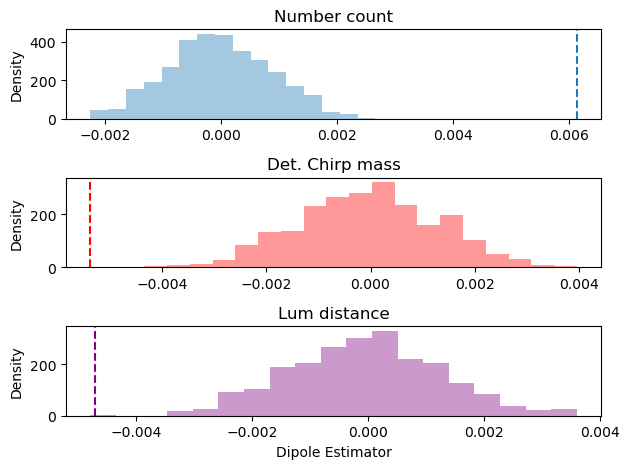

In [2]:
Nuse=1e6
fig,ax=plt.subplots(3,1)
inoise=500
vc_map=np.zeros(inoise)

# Caculate e plot the dipole estimator
ee,hh=vc_estimator(bin_det['phi'][:int(Nuse):],bin_det['theta'][:int(Nuse):],np.array([0.]),np.array([0.]),8)
for i in range(len(vc_map)):
    vc_map[i],_=vc_estimator(bin_det['phi'][:int(Nuse):],bin_det['theta'][:int(Nuse):],np.array([0.]),np.array([0.]),8,shuffle=True,hh=hh)

ax[0].hist(vc_map,bins='auto',density=True,label='Suffling',alpha=0.4)
ax[0].axvline(ee,ls='--')
ax[0].set_title('Number count')
ax[0].set_ylabel('Density')


#Includes scattering due to noise
esti=chirp_mass(bin_det['mass1'][:int(Nuse):],bin_det['mass2'][:int(Nuse):])*(1+0.01*np.random.randn(int(Nuse)))

# Caculate e plot the dipole estimator
ee,hh=vc_estimator(bin_det['phi'][:int(Nuse):],bin_det['theta'][:int(Nuse):],np.array([0.]),np.array([0.]),8,
                 var=esti)
for i in range(len(vc_map)):
    vc_map[i],_=vc_estimator(bin_det['phi'][:int(Nuse):],bin_det['theta'][:int(Nuse):],np.array([0.]),np.array([0.]),8,shuffle=True
                            ,var=esti,hh=hh)

ax[1].hist(vc_map/np.mean(esti),bins='auto',density=True,label='Suffling',alpha=0.4,color='red')
ax[1].axvline(ee/np.mean(esti),ls='--',color='red')
ax[1].set_title('Det. Chirp mass')
ax[1].set_ylabel('Density')
                                                                              
esti=bin_det['dl'][:int(Nuse):]*(1+.2*np.random.randn(int(Nuse))) # dl with noise
                                                                              
ee,hh=vc_estimator(bin_det['phi'][:int(Nuse):],bin_det['theta'][:int(Nuse):],np.array([0.]),np.array([0.]),8,
                 var=esti)
for i in range(len(vc_map)):
    vc_map[i],_=vc_estimator(bin_det['phi'][:int(Nuse):],bin_det['theta'][:int(Nuse):],np.array([0.]),np.array([0.]),8,shuffle=True
                            ,var=esti,hh=hh)

ax[2].hist(vc_map/np.mean(esti),bins='auto',density=True,label='Suffling',alpha=0.4,color='purple')
ax[2].axvline(ee/np.mean(esti),ls='--',color='purple')
ax[2].set_xlabel('Dipole Estimator')
ax[2].set_title('Lum distance')
ax[2].set_ylabel('Density')

plt.tight_layout()





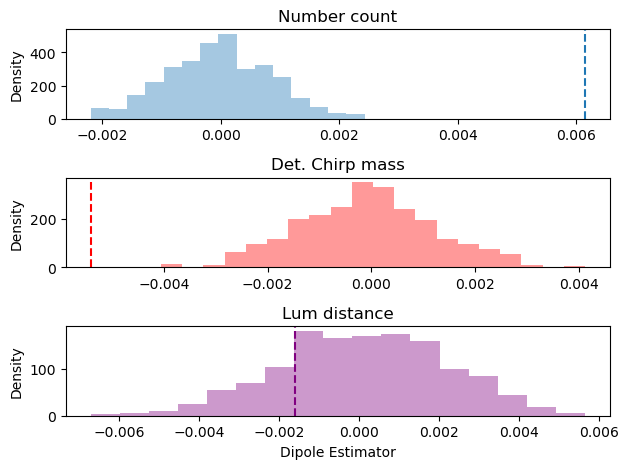

In [3]:
Nuse=1e6
fig,ax=plt.subplots(3,1)
inoise=500
vc_map=np.zeros(inoise)

# Caculate e plot the dipole estimator
ee,hh=vc_estimator(bin_det['phi'][:int(Nuse):],bin_det['theta'][:int(Nuse):],np.array([0.]),np.array([0.]),8)
for i in range(len(vc_map)):
    vc_map[i],_=vc_estimator(bin_det['phi'][:int(Nuse):],bin_det['theta'][:int(Nuse):],np.array([0.]),np.array([0.]),8,shuffle=True,hh=hh)

ax[0].hist(vc_map,bins='auto',density=True,label='Suffling',alpha=0.4)
ax[0].axvline(ee,ls='--')
ax[0].set_title('Number count')
ax[0].set_ylabel('Density')


#Includes scattering due to noise
esti=chirp_mass(bin_det['mass1'][:int(Nuse):],bin_det['mass2'][:int(Nuse):])*(1+0.01*np.random.randn(int(Nuse)))

# Caculate e plot the dipole estimator
ee,hh=vc_estimator(bin_det['phi'][:int(Nuse):],bin_det['theta'][:int(Nuse):],np.array([0.]),np.array([0.]),8,
                 var=esti)
for i in range(len(vc_map)):
    vc_map[i],_=vc_estimator(bin_det['phi'][:int(Nuse):],bin_det['theta'][:int(Nuse):],np.array([0.]),np.array([0.]),8,shuffle=True
                            ,var=esti,hh=hh)

ax[1].hist(vc_map/np.mean(esti),bins='auto',density=True,label='Suffling',alpha=0.4,color='red')
ax[1].axvline(ee/np.mean(esti),ls='--',color='red')
ax[1].set_title('Det. Chirp mass')
ax[1].set_ylabel('Density')
                                                                              
esti=bin_det['dl'][:int(Nuse):]*(1+.8*np.random.randn(int(Nuse))) # dl with noise
                                                                              
ee,hh=vc_estimator(bin_det['phi'][:int(Nuse):],bin_det['theta'][:int(Nuse):],np.array([0.]),np.array([0.]),8,
                 var=esti)
for i in range(len(vc_map)):
    vc_map[i],_=vc_estimator(bin_det['phi'][:int(Nuse):],bin_det['theta'][:int(Nuse):],np.array([0.]),np.array([0.]),8,shuffle=True
                            ,var=esti,hh=hh)

ax[2].hist(vc_map/np.mean(esti),bins='auto',density=True,label='Suffling',alpha=0.4,color='purple')
ax[2].axvline(ee/np.mean(esti),ls='--',color='purple')
ax[2].set_xlabel('Dipole Estimator')
ax[2].set_title('Lum distance')
ax[2].set_ylabel('Density')

plt.tight_layout()





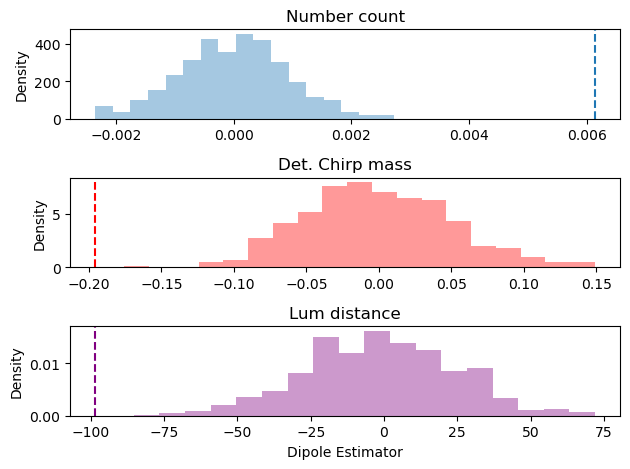

In [4]:
Nuse=1e6
fig,ax=plt.subplots(3,1)
inoise=500
vc_map=np.zeros(inoise)

# Caculate e plot the dipole estimator
ee,hh=vc_estimator(bin_det['phi'][:int(Nuse):],bin_det['theta'][:int(Nuse):],np.array([0.]),np.array([0.]),8)
for i in range(len(vc_map)):
    vc_map[i],_=vc_estimator(bin_det['phi'][:int(Nuse):],bin_det['theta'][:int(Nuse):],np.array([0.]),np.array([0.]),8,shuffle=True,hh=hh)

ax[0].hist(vc_map,bins='auto',density=True,label='Suffling',alpha=0.4)
ax[0].axvline(ee,ls='--')
ax[0].set_title('Number count')
ax[0].set_ylabel('Density')


#Includes scattering due to noise
esti=chirp_mass(bin_det['mass1'][:int(Nuse):],bin_det['mass2'][:int(Nuse):])

# Caculate e plot the dipole estimator
ee,hh=vc_estimator(bin_det['phi'][:int(Nuse):],bin_det['theta'][:int(Nuse):],np.array([0.]),np.array([0.]),8,
                 var=esti)
for i in range(len(vc_map)):
    vc_map[i],_=vc_estimator(bin_det['phi'][:int(Nuse):],bin_det['theta'][:int(Nuse):],np.array([0.]),np.array([0.]),8,shuffle=True
                            ,var=esti,hh=hh)

ax[1].hist(vc_map,bins='auto',density=True,label='Suffling',alpha=0.4,color='red')
ax[1].axvline(ee,ls='--',color='red')
ax[1].set_title('Det. Chirp mass')
ax[1].set_ylabel('Density')


                                                                              
esti=bin_det['dl'][:int(Nuse):]
                                                                              
ee,hh=vc_estimator(bin_det['phi'][:int(Nuse):],bin_det['theta'][:int(Nuse):],np.array([0.]),np.array([0.]),8,
                 var=esti)
for i in range(len(vc_map)):
    vc_map[i],_=vc_estimator(bin_det['phi'][:int(Nuse):],bin_det['theta'][:int(Nuse):],np.array([0.]),np.array([0.]),8,shuffle=True
                            ,var=esti,hh=hh)

ax[2].hist(vc_map,bins='auto',density=True,label='Suffling',alpha=0.4,color='purple')
ax[2].axvline(ee,ls='--',color='purple')
ax[2].set_xlabel('Dipole Estimator')
ax[2].set_title('Lum distance')
ax[2].set_ylabel('Density')

plt.tight_layout()



